In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
import Contour_plot 
from Contour_plot import ctr_plot
import gsw
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
from datetime import datetime

#Set data directory
data_dir = 'data/'

#Call SOCCOM data
SOCCOM = pd.read_pickle('data/SOCCOM_snapshot.pkl')

#Call SOCCOM data with eddy_matchups
SOCCOM_eddy = pd.read_pickle('data/SOCCOM_eddy_matchups.pkl')

#Call subset of SOCCOM data
#SOCCOM_subset = pd.read_pickle('data/unique_subset.pkl')

#Define SOCCOM variables in simplier terms
DIC = 'DIC_LIAR[µmol/kg]'
TA = 'TALK_LIAR[µmol/kg]'
salinity = 'Salinity[pss]'
temperature = 'Temperature[°C]'
depth = 'Depth[m]'
oxygen = 'Oxygen[µmol/kg]'
oxygen_sat = 'OxygenSat[%]'
nitrate = 'Nitrate[µmol/kg]'
chl_a = 'Chl_a_corr[mg/m^3]'
pH = 'pHinsitu[Total]'
pCO2 = 'pCO2_LIAR[µatm]'
lat = 'Lat [°N]'
lon = 'Lon [°E]'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 


def ctr_plot (df, df_eddy, float_ID, x_var, y_var, z_var,duplicates):

    """
    Inputs
    ----------
    df (pandas.dataframe): pkl of SOCCOM data
    df_eddy (pandas.dataframe): plk of eddy data from matchups between SOCCOM data and eddy trajectories
    fload_ID (str): Cruise number of floats
    x_var (str): variable on x-axis of contour plot
    y_var (str): variable on y-axis of contour plot
    z_var (str): variable on z-axis of contour plot
    
    Returns: tricontour plot 

    """
    
    #for k, value in kwargs.items():
        #if 
    
    # Create SOCCOM subset for given cruise #
    flt = df.loc[df['Cruise'] == float_ID]
    Subset = flt[pd.notna(df[z_var])]
    
    # Get eddy location
    eddy_ID_cyclonic = df_eddy.loc[
        (df_eddy['eddy_type'] != 0) & 
        (df_eddy['Cruise'] == float_ID) & 
        (df_eddy['eddy_type'] == -1)
    ]
    eddy_ID_anticyclonic = df_eddy.loc[
        (df_eddy['eddy_type'] != 0) & 
        (df_eddy['Cruise'] == float_ID) & 
        (df_eddy['eddy_type'] == 1)
    ]
    
    #adjust length to appear on plot
    eddy_length_cyclonic = len(eddy_ID_cyclonic)
    eddy_y_cyclonic = [10] * eddy_length_cyclonic
    
    eddy_length_anticyclonic = len(eddy_ID_anticyclonic)
    eddy_y_anticyclonic = [10] * eddy_length_anticyclonic
    
    # Get location of eddy IDs that occure multiple times throughout float track
    mult_eddies = SOCCOM_eddy.loc[
        (SOCCOM_eddy['Cruise'] == float_ID) & 
        ((SOCCOM_eddy['eddy_ID'] == 356580)  
        | (SOCCOM_eddy['eddy_ID'] == 166673 )
        | (SOCCOM_eddy['eddy_ID'] == 167847 )
        | (SOCCOM_eddy['eddy_ID'] == 171547 ))
    ]
    
    mult_eddies_length = len(mult_eddies)
    mult_eddies_y = [10] * mult_eddies_length
    
    
    fig, ax = plt.subplots(1,1)
    
    ct = ax.tricontourf(Subset[x_var], Subset[y_var], Subset[z_var])
    plt.gca().invert_yaxis()
    
    cbar = fig.colorbar(ct)
    cbar.set_label(z_var, rotation=270, labelpad=15)
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    plt.ylim(bottom = 250)
    
    plt.scatter(
        Subset[x_var], 
        Subset['Depth[m]'], 
        s=0.25, 
        c='black', 
        alpha=0.1,
    ) 
    
    plt.scatter(eddy_ID_cyclonic[x_var], eddy_y_cyclonic, c='red', s =20)
    plt.scatter(eddy_ID_anticyclonic[x_var], eddy_y_anticyclonic, c='blue', s =20)
    #plt.scatter(mult_eddies[x_var],mult_eddies_y,c='yellow', edgecolor = 'yellow', s=20)
    
    return plt.show(), eddy_ID_cyclonic, eddy_ID_anticyclonic



/var/folders/l9/7zbywdnj5_3448lb_wpzv3t40000gp/T/ipykernel_61769/1092526604.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Subset = flt[pd.notna(df[z_var])]


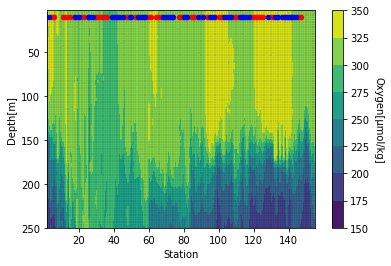

1273716    14
1273785    15
1273845    16
1273981    18
2060729     9
2060792    10
2060856    11
2060919    12
Name: Station, dtype: int64


In [3]:
float_ID = 5904686                                                                                                                                                                                                               
x_var = 'Station'
y_var = 'Depth[m]'
z_var = oxygen
duplicates = []

test = ctr_plot(SOCCOM, SOCCOM_eddy, float_ID, x_var, y_var, z_var, duplicates ==True)

#Cylonic = red, Anticyclonic = blue
print(SOCCOM_eddy['Station'].loc[SOCCOM_eddy['eddy_ID'] == 182518])

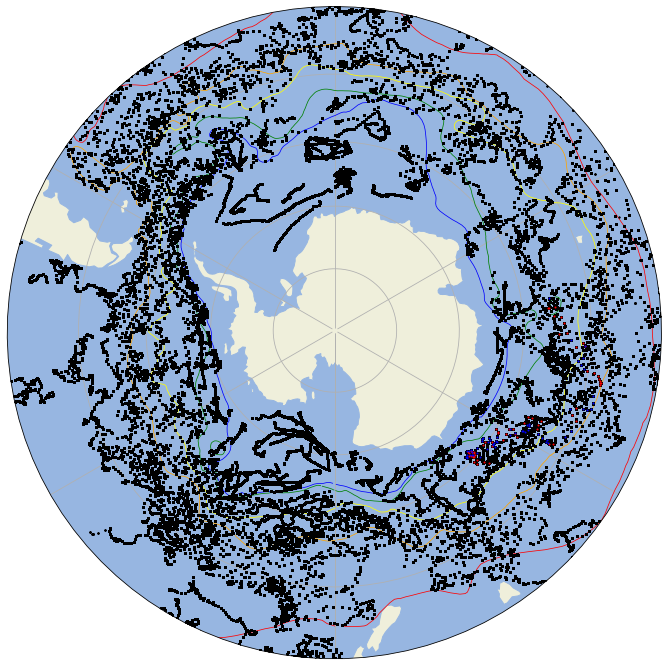

In [4]:
#Define orsi fronts: From Veronica and Nancy
def load_orsi_fronts(data_dir):
    # Import the Southern Ocean fronts for mapping
    stf = pd.read_csv(data_dir + 'fronts/stf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saf = pd.read_csv(data_dir + 'fronts/saf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    pf = pd.read_csv(data_dir + 'fronts/pf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saccf = pd.read_csv(data_dir + 'fronts/saccf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    sbdy = pd.read_csv(data_dir + 'fronts/sbdy.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    
    return stf,saf,pf,saccf,sbdy

stf, saf, pf, saccf, sbdy = load_orsi_fronts(data_dir)


#Plot specific float

#SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == float_ID]
#SOCCOM_float_sub = SOCCOM_float.loc[SOCCOM_float['Station'] <= 102]

eddy_ID_cyclonic = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) 
                                   & (SOCCOM_eddy['Cruise'] == float_ID) 
                                   & (SOCCOM_eddy['eddy_type'] == -1)
                                   #& (SOCCOM_float['Station'] <= 102)
                                  ]
eddy_ID_anticyclonic = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) 
                                   & (SOCCOM_eddy['Cruise'] == float_ID) 
                                   & (SOCCOM_eddy['eddy_type'] == 1)
                                   #& (SOCCOM_float['Station'] <= 102)
                                  ]
# Identify location of multiple occurences of same eddy ID
#mult_eddies = SOCCOM_eddy.loc[(SOCCOM_eddy['Cruise'] == float_ID)
#                                   &((SOCCOM_eddy['eddy_ID'] == 356580) 
#                                   | (SOCCOM_eddy['eddy_ID'] == 166673 )
#                                   | (SOCCOM_eddy['eddy_ID'] == 167847 )
#                                   | (SOCCOM_eddy['eddy_ID'] == 171547 )
#                                   | (SOCCOM_eddy['eddy_ID'] == 372855 )
#                                   | (SOCCOM_eddy['eddy_ID'] == 180467 )
#                                    )
#                                  ]
    
plt.figure(figsize =(12,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(ccrs.PlateCarree(), draw_labels=True)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform = ax.transAxes)
plt.plot(stf['lon'], stf['lat'], color='Red', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saf['lon'], saf['lat'], color='Orange', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(pf['lon'], pf['lat'], color='Yellow', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saccf['lon'], saccf['lat'], color='Green', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(sbdy['lon'], sbdy['lat'], color='Blue', transform=ccrs.PlateCarree(), linewidth=.75)


#plt.scatter(SOCCOM_float_sub['Lon [°E]'], SOCCOM_float_sub['Lat [°N]'], color = 'Black', edgecolor = 'black', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(SOCCOM['Lon [°E]'], SOCCOM['Lat [°N]'], color = 'Black', edgecolor = 'black', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(eddy_ID_cyclonic['Lon [°E]'], eddy_ID_cyclonic['Lat [°N]'],c='red', edgecolor = 'red', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(eddy_ID_anticyclonic['Lon [°E]'], eddy_ID_anticyclonic['Lat [°N]'],c='blue', edgecolor = 'blue', transform=ccrs.PlateCarree(), s=1, zorder=1001)

# plot repeat eddy locations
#plt.scatter(mult_eddies['Lon [°E]'],mult_eddies['Lat [°N]'],c='yellow', edgecolor = 'yellow', transform=ccrs.PlateCarree(), s=1, zorder=1001)

The max difference is  0.049009435339939955 and the minimum difference is  0.04256719539455389
0          9.314528
1          8.857386
2          8.397222
3          7.938128
4          7.476470
             ...   
2516802    0.089832
2516803    0.072989
2516804    0.056871
2516805    0.038881
2516806         NaN
Length: 2516807, dtype: float64


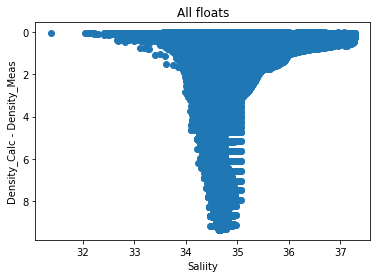

In [11]:
# ------------------- Equation of State/ Density for all floats ------------------- #

# Calculating density from equation of state and comparing it to density given
# in Argo Float file
# From Nicola (starting at line 1745 in her code)

# https://teos-10.github.io/GSW-Python/intro.html 

# Need:
    # sea pressure in dbar (sea pressure = absolute pressure - 10.1325 )
    # absolute salinity in g/kg
    # conservative temperature in degree C
    
###### This attempt is assuming that the pressure given is not sea pressure, but absolute pressure
### If density is significantly different from my float density, will try nest without changing pressure

#Density_calc = SOCCOM['insitu_dens(kg/m)2']
#Density_meas = (SOCCOM['Sigma_theta[kg/m^3]']+1000)

# Sea Pressure 
SOCCOM['sea_press[dbar]'] = SOCCOM['Pressure[dbar]'] - 10.1325

# Salinity pss (Practical Salinity Scale) to Absolute salinity (g/kg)
SOCCOM['abs_sal[g/kg]'] = gsw.SA_from_SP(SOCCOM['Salinity[pss]'], SOCCOM['sea_press[dbar]'],
                                       SOCCOM['Lon [°E]'], SOCCOM['Lat [°N]']) # Absolute Salinity
# Conservative Temperature
SOCCOM['con_temp(C)'] = gsw.CT_from_t(SOCCOM['abs_sal[g/kg]'], SOCCOM['Temperature[°C]'],
                                    SOCCOM['sea_press[dbar]']) # Conservative Temperature

# In situ Desnity
SOCCOM['insitu_dens(kg/m)'] = gsw.density.rho(SOCCOM['abs_sal[g/kg]'], SOCCOM['con_temp(C)'], SOCCOM['sea_press[dbar]']) # In Situ Density

### Compare In situ Density (kg/m) to Density given (kg/m^3)
diff = SOCCOM['insitu_dens(kg/m)'] - (SOCCOM['Sigma_theta[kg/m^3]']+1000)

# In situ Desnity without changing pressure
SOCCOM['insitu_dens(kg/m)2'] = gsw.density.rho(SOCCOM['abs_sal[g/kg]'], SOCCOM['con_temp(C)'], SOCCOM['Pressure[dbar]']) # In Situ Density

### Compare In situ Density (kg/m) to Density given (kg/m^3)
diff2 = SOCCOM['insitu_dens(kg/m)2'] - (SOCCOM['Sigma_theta[kg/m^3]']+1000)

difftot = diff2-diff

#set density var
density = (SOCCOM['Sigma_theta[kg/m^3]']+1000)

print('The max difference is ', max(difftot), 'and the minimum difference is ', min(difftot))
print(SOCCOM['insitu_dens(kg/m)2'] - density ) # has some larger density differences a the top stations.

plt.scatter(SOCCOM[salinity],diff2)
plt.title('All floats')
plt.xlabel('Saliity')
plt.ylabel('Density_Calc - Density_Meas')
plt.gca().invert_yaxis()
#Look at salinity and temperature, also look at depth

2516807
2516807


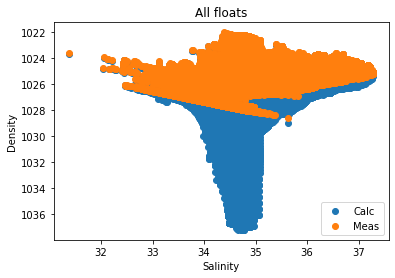

In [10]:
#Plot the density calculated and density measured for comparison

plt.scatter(SOCCOM[salinity],SOCCOM['insitu_dens(kg/m)2'],label="Calc")
plt.scatter(SOCCOM[salinity],density,label="Meas")
plt.title('All floats')
plt.xlabel('Salinity')
plt.ylabel('Density')
plt.gca().invert_yaxis()
plt.legend(loc="lower right")

print(len(SOCCOM['insitu_dens(kg/m)2']))
print(len(density))

In [37]:
# Lon
lon_min,lon_max = 0,120 #E

# Lat 
lat_min,lat_max = -55,-40 #S

for f in SOCCOM['Cruise']:
    # Goal: look at each specific float, find lat/lon min and max for float, if it is within sample range, add to subset
        lat_minf = SOCCOM
        lon_min,lon_max = SOCCOM['Lon [°E]'].min(),SOCCOM['Lon [°E]'].max()
    


TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [33]:
# Lon
lon_min,lon_max = SOCCOM['Lon [°E]'].min(),SOCCOM['Lon [°E]'].max()

# Lat
lat_min,lat_max = -55,-40

float_subset = SOCCOM.loc(
    SOCCOM[lon] == slice(lon_min-2,lon_max+2),
    SOCCOM[lat] == slice(lat_min-2,lat_max+2)
)

#float_subset.load()

ValueError: unknown type object

In [20]:
# ------------------- Subset of data in Saildrone area ------------------- #

#Identify eddies within our specific float path (pfloat)
#longitude:15-120E
#latitude: 40-55S

# Look at Nicolas code
        
### Set Boundaries on Lat and Lon ###

# Lon
lon_min,lon_max = SOCCOM['Lon [°E]'].min(),SOCCOM['Lon [°E]'].max()

# Lat
lat_min,lat_max = -55,-40
#lat_min,lat_max = window['latitude'].min(), window['latitude'].max() #window


### Subset CCMP data to match time, lat and lon boundaries, and collocate
float_subset = SOCCOM.sel(
    longitude = slice(lon_min-2,lon_max+2),
    latitude = slice(lat_min-2,lat_max+2),
    #time = slice(time_min, time_max)) 
# Time Max is March 5 but your wind are only from February
# Using "linear" interpolation it will fill in a value from the wrong day.
# Need to add winds and ocean currents for March
float_subset.load()

# Pinpoint locations of interest within ARGO_Surface #
#lat_points = xr.DataArray(SOCCOM['Lat [°N]'], dims = 'points')
#lon_points = xr.DataArray(SOCCOM['Lon [°E]']+360, dims = 'points')
#time_points = xr.DataArray(SOCCOM['date'], dims = 'points')

#
#float_sub_collocated = float_subset.interp(
#    latitude = lat_points,
#    longitude = lon_points,
#    time = time_points,
#    method = 'linear')

SyntaxError: unexpected EOF while parsing (793349825.py, line 40)

The max difference is  nan and the minimum difference is  nan
1088797         NaN
1088798         NaN
1088799         NaN
1088800         NaN
1088801         NaN
             ...   
1167919    0.048831
1167920    0.039254
1167921    0.029288
1167922    0.021205
1167923         NaN
Length: 79127, dtype: float64


/Users/sarahbartoloni/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Text(0, 0.5, 'Density_Calc - Density_Meas')

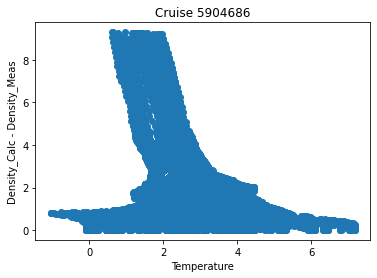

In [23]:
# ------------------- Equation of State/ Density for a single flaot ------------------- #

t = SOCCOM.loc[SOCCOM['Cruise'] == 5904686]


# Sea Pressure 
t['sea_press[dbar]'] = t['Pressure[dbar]'] - 10.1325

# Salinity pss (Practical Salinity Scale) to Absolute salinity (g/kg)
t['abs_sal[g/kg]'] = gsw.SA_from_SP(t['Salinity[pss]'], t['sea_press[dbar]'],
                                       t['Lon [°E]'], t['Lat [°N]']) # Absolute Salinity
# Conservative Temperature
t['con_temp(C)'] = gsw.CT_from_t(t['abs_sal[g/kg]'], t['Temperature[°C]'],
                                    t['sea_press[dbar]']) # Conservative Temperature

# In situ Desnity
t['insitu_dens(kg/m)'] = gsw.density.rho(t['abs_sal[g/kg]'], t['con_temp(C)'], t['sea_press[dbar]']) # In Situ Density

### Compare In situ Density (kg/m) to Density given (kg/m^3)
difft = t['insitu_dens(kg/m)'] - (t['Sigma_theta[kg/m^3]']+1000)

# In situ Desnity without changing pressure
t['insitu_dens(kg/m)2'] = gsw.density.rho(t['abs_sal[g/kg]'], t['con_temp(C)'], t['Pressure[dbar]']) # In Situ Density

### Compare In situ Density (kg/m) to Density given (kg/m^3)
diff2t = t['insitu_dens(kg/m)2'] - (t['Sigma_theta[kg/m^3]']+1000)

difftott = diff2t-difft     # don't understand what this is computing, but gives very small differences

#set density var
densityt = (t['Sigma_theta[kg/m^3]']+1000)

print('The max difference is ', max(difftott), 'and the minimum difference is ', min(difftott))
print(t['insitu_dens(kg/m)2'] - densityt ) # has some larger density differences a the top stations.

plt.scatter(t[temperature],diff2t)
plt.title('Cruise 5904686')
plt.xlabel('Temperature')
plt.ylabel('Density_Calc - Density_Meas')
#Look at salinity and temperature, also look at depth

-------------------- Old code for nancy below -------------------- 

In [5]:
# Identify eddy_IDs of eddys that occur multiple times in one float path

t = SOCCOM_eddy['eddy_ID'].loc[SOCCOM['Cruise'] == 5904686]

seen = []
dupes = []

for x in t:
    if x in seen:
        dupes.append(x)
    else:
        seen.append(x)
            
print(dupes)

[<xarray.DataArray 'eddy_ID' ()>
array(352132.)
Coordinates:
    time     datetime64[ns] 2016-04-05T14:21:00
    lat      float64 -56.13
    lon      float64 84.01, <xarray.DataArray 'eddy_ID' ()>
array(352132.)
Coordinates:
    time     datetime64[ns] 2016-04-15T17:34:00
    lat      float64 -55.98
    lon      float64 84.08, <xarray.DataArray 'eddy_ID' ()>
array(353687.)
Coordinates:
    time     datetime64[ns] 2016-06-15T00:22:00
    lat      float64 -54.35
    lon      float64 86.7, <xarray.DataArray 'eddy_ID' ()>
array(353687.)
Coordinates:
    time     datetime64[ns] 2016-06-25T01:10:00
    lat      float64 -54.05
    lon      float64 88.21, <xarray.DataArray 'eddy_ID' ()>
array(162963.)
Coordinates:
    time     datetime64[ns] 2016-09-03T07:08:00
    lat      float64 -50.86
    lon      float64 93.48, <xarray.DataArray 'eddy_ID' ()>
array(355294.)
Coordinates:
    time     datetime64[ns] 2016-10-03T15:13:00
    lat      float64 -50.86
    lon      float64 93.44, <xarray.DataArra

In [36]:
# Old trial for finding eddy multiples

f = []
seen = []
mult = []
dupes = []
for x in ed_ID['eddy_ID']:
    if x in seen:
        dupes.append(x);
        mult.append(f);
        print(f);
    else:
        seen.append(x)
print(seen)
            
#    for i in mult:
#        if i == f:
#            ID = f
#            sel_flt_2.append(ID)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<xarray.DataArray 'eddy_ID' ()>
array(nan)
Coordinates:
    time     datetime64[ns] 2016-02-25T15:45:00
    lat      float64 -57.41
    lon      float64 82.36, <xarray.DataArray 'eddy_ID' ()>
array(nan)
Coordinates:
    time     datetime64[ns] 2016-03-06T14:29:00
    lat      float64 -56.81
    lon      float64 81.24, <xarray.DataArray 'eddy_ID' ()>
array(159953.)
Coordinates:
    time     datetime64[ns] 2016-03-16T12:53:00
    lat      float64 -55.82
    lon      float64 81.43, <xarray.DataArray 'eddy_ID' ()>
array(352132.)
Coordinates:
    time     datetime64[ns] 2016-03-26T13:02:00
    lat      float64 -55.14
    lon      float64 83.83, <xarray.DataArray 'eddy_ID' ()>
array(nan)
Coordinates:
    time     datetime64[ns] 2016-04-25T19:19:00
    lat      float64 -55.85
    lon      fl

In [7]:
sel_flt = []

for f in floatID_ed:
    
    SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == f]  # gets SOCCOM data for this float_id
    eID = SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == f]

    
    # check that there is enough float data in SOCCOM df
    # SOCCOM_float.unique
    has_enough_float_data = len(SOCCOM_float['Station'].unique()) >= 10
    
    # check presence of an eddy data
    eddy_length = len(
        SOCCOM_eddy.loc[
            (SOCCOM_eddy['eddy_type'] != 0) & 
            (SOCCOM_eddy['Cruise'] == f)
        ]
    )
    has_enough_eddy_data = eddy_length >= 1   
                                      
    # check that there is pH data at every point
    boolean_list = np.isnan(SOCCOM_float[pH])
    has_ph_data = all(boolean_list) == False
    
    seen = []
    dupes = []
    mult = []

    #check to see if there are any duplicated eddy IDs
    
    #for x in eID:
     #   if x in seen:
     #       dupes.append(x)
     #       mult.append(f)
     #   else:
     #       seen.append(x)
            
    #for i in mult:
       # if i == f:
       #     has_dupes = 1
       # else:
       #     has_dupes = 0
    
    if has_enough_float_data & has_enough_eddy_data & has_ph_data: #& has_dupes == 1 :
        ID = f
        sel_flt.append(ID)    
        
print(sel_flt)

[5905997, 5905370, 5905071, 5904761, 5906227, 5905639, 5905369, 5904658, 5904188, 5904396, 5905132, 5904763, 5904683, 5905372, 5905376, 5906000, 5905077, 5904663, 5905134, 5904857, 5904661, 5905109, 5905075, 5905374, 5904678, 5904685, 5904765, 5904397, 5905373, 5906219, 5906224, 5904682, 5905638, 5905070, 5905996, 5904659, 5905131, 5905368, 5904395, 5904660, 5905108, 5904856, 5905135, 5906222, 5904679, 5904684, 5906003, 5905377, 5906001, 5905076, 5904766, 5904686, 5904662, 5904854, 5904693, 5904472, 5905985, 5904841, 5906030, 5906213, 5905078, 5905379, 5904469, 5906032, 5904768, 5904675, 5904470, 5904983, 5904185, 5905983, 5904474, 5904695, 5906217, 5904671, 5906036, 5904673, 5905998, 5904187, 5904657, 5904674, 5904842, 5905079, 5905105, 5906209, 5904984, 5904859, 5904473, 5905107, 5906008, 5906035, 5904860, 5905367, 5904186, 5904980, 5904477, 5904184, 5904982, 5906216]


In [8]:
sel_flt_2 = []
for f in sel_flt:
    
    #find all eddy IDs within float f
    eID = SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == f]
    
    seen = []
    dupes = []
    mult = []

    #check to see if there are any duplicated eddy IDs
    
    for x in eID:
        if x in seen:
            dupes.append(x)
            mult.append(f)
            print(f)
        else:
            seen.append(x)
            
    for i in mult:
        if i == f:
            ID = f
            sel_flt_2.append(ID)
                           
print(sel_flt_2)

5905997
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904658
5904658
5904658
5904658
5904658
5904658
5904658
5904658
5904658
5904658


5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5905638
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659


5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904472
5904472
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906213
5906213
5906213
5905078
5905078
5905078
5905078
5905078


5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5906209
5906209
5906209
5906209
5906209
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904859
5904859
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5906008
5906008
5906008
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5904860
5904860
5905367
5905367
5905367
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186


In [9]:
# function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

In [10]:
unique(sel_flt_2)

5905997
5905370
5905071
5904761
5904658
5904188
5904396
5905132
5904763
5904683
5905372
5905376
5905077
5904663
5905134
5904661
5905109
5905075
5905374
5904678
5904685
5904765
5904397
5905373
5906219
5906224
5904682
5905638
5905070
5905996
5904659
5905131
5905368
5904395
5904660
5905108
5904856
5905135
5906222
5904679
5904684
5906003
5905377
5906001
5905076
5904766
5904686
5904662
5904854
5904693
5904472
5905985
5904841
5906030
5906213
5905078
5905379
5904469
5906032
5904768
5904675
5904470
5904983
5904185
5905983
5904474
5904695
5906217
5904671
5906036
5904673
5905998
5904187
5904657
5904674
5904842
5905079
5905105
5906209
5904984
5904859
5904473
5905107
5906008
5906035
5904860
5905367
5904186
5904980
5904477
5904184
5904982
5906216


In [11]:
SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == 5906216]

2501462    <xarray.DataArray 'eddy_ID' ()>\narray(185382....
2501531    <xarray.DataArray 'eddy_ID' ()>\narray(183670....
2501600    <xarray.DataArray 'eddy_ID' ()>\narray(183670....
2501670    <xarray.DataArray 'eddy_ID' ()>\narray(186056....
2501740    <xarray.DataArray 'eddy_ID' ()>\narray(378824....
                                 ...                        
2505395    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505466    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505537    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505608    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505679    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
Name: eddy_ID, Length: 61, dtype: object